In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import timedelta as delta
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats

from matplotlib.lines import Line2D
import matplotlib.cm  as cm
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.patches import Rectangle

In [2]:
river_sources = np.load('../river_sources.npy', allow_pickle=True).item()

In [3]:
river_sources

{'Congo': (-5.6442, 12.1375),
 'Cape-Town': (-33.93, 18.56),
 'Rio-de-la-Plata': (-33.9375, -58.5208),
 'Porto-Alegre': (-30.051, -51.285),
 'Santos': (-23.9875, -46.2958),
 'Paraiba': (-21.6208, -41.0375),
 'Itajai': (-26.9125, -48.6458),
 'Rio-de-Janeiro': (-23.0125, -43.32083),
 'Salvador': (-13.017065, -38.579832),
 'Recife': (-8.09, -34.88)}

In [48]:
ordered_labels = ['Recife',
                  'Salvador',
                  'Paraiba',
                  'Rio-de-Janeiro',
                  'Santos',
                  'Itajai',
                  'Porto-Alegre',
                  'Rio-de-la-Plata',
                  'Cape-Town',
                  'Congo',
                  'Unclustered-Africa',
                  'Unclustered-America']

In [50]:
clusters = ordered_labels[:-2]

In [51]:
clusters

['Recife',
 'Salvador',
 'Paraiba',
 'Rio-de-Janeiro',
 'Santos',
 'Itajai',
 'Porto-Alegre',
 'Rio-de-la-Plata',
 'Cape-Town',
 'Congo']

# Averaged Plots

In [5]:
posterior = xr.load_dataset('../analysis/posterior_average_1234.nc')
likelihood = xr.load_dataset('../analysis/likelihood_average_1234.nc')

In [6]:
# posterior = xr.load_dataset('../data/analysis/sa-s06/posterior_sa-s06_aw1234.nc')
# likelihood = xr.load_dataset('../data/analysis/sa-s06/likelihood_sa-S06_aw1234.nc')

In [7]:
posterior

<xarray.Dataset>
Dimensions:              (time: 1, x: 98, y: 80)
Coordinates:
  * time                 (time) int64 1234
    lon                  (x) float64 -73.0 -71.99 -70.98 ... 22.98 23.99 25.0
    lat                  (y) float64 -80.0 -78.99 -77.97 ... -2.025 -1.013 0.0
Dimensions without coordinates: x, y
Data variables: (12/13)
    Congo                (time, x, y) float64 nan nan nan nan ... nan nan nan
    Cape-Town            (time, x, y) float64 nan nan nan nan ... nan nan nan
    Rio-de-la-Plata      (time, x, y) float64 nan nan nan nan ... nan nan nan
    Porto-Alegre         (time, x, y) float64 nan nan nan nan ... nan nan nan
    Santos               (time, x, y) float64 nan nan nan nan ... nan nan nan
    Paraiba              (time, x, y) float64 nan nan nan nan ... nan nan nan
    ...                   ...
    Rio-de-Janeiro       (time, x, y) float64 nan nan nan nan ... nan nan nan
    Salvador             (time, x, y) float64 nan nan nan nan ... nan nan nan
    Recife               (time, x, y) float64 nan nan nan nan ... nan nan nan
    Unclustered-Africa   (time, x, y) float64 nan nan nan nan ... nan nan nan
    Unclustered-America  (time, x, y) float64 nan nan nan nan ... nan nan nan
    counts               (time, x, y) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:     Posterior probability.
    average_window:  1234

In [8]:
labels = list(posterior.keys())
labels.pop(-1)
# labels.pop(0)

'counts'

In [9]:
labels

['Congo',
 'Cape-Town',
 'Rio-de-la-Plata',
 'Porto-Alegre',
 'Santos',
 'Paraiba',
 'Itajai',
 'Rio-de-Janeiro',
 'Salvador',
 'Recife',
 'Unclustered-Africa',
 'Unclustered-America']

In [10]:
y,x = np.meshgrid(posterior['lat'], posterior['lon'])

# Probability maps

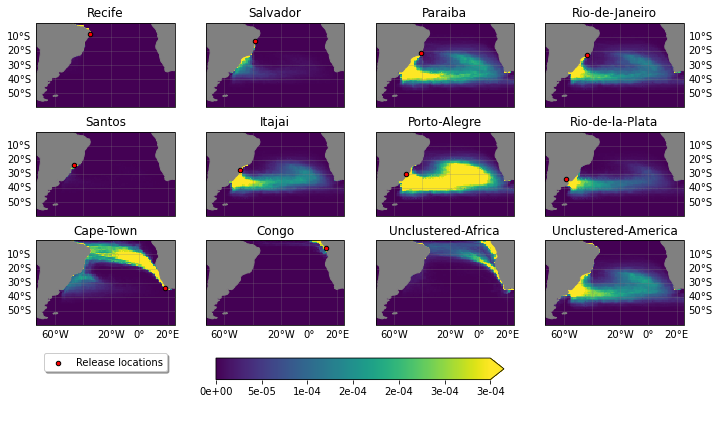

In [49]:
# likelihood
t = 0
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       sharey=True, constrained_layout=True)
ax = ax.reshape(16)

for k, loc in enumerate(ordered_labels):
    z = likelihood[loc][t]
    ax[k].set_extent([-73.0, 25, -60, 0], crs=ccrs.PlateCarree())
    # ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=2, facecolor='#808080')
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x, y, z, cmap='viridis', vmax=0.0003)
    
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.5)

    if k in [1, 2, 3, 5, 6, 7, 9, 10, 11]:
        gl.left_labels = False

    if k in [0, 1, 2, 3, 4, 5, 6, 7]:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False
    
    if k in [3, 7, 11]:
        gl.right_labels = True
        
    if loc not in ['Unclustered-Africa', 'Unclustered-America']:
        h = ax[k].scatter(river_sources[loc][1], river_sources[loc][0],
                          s=20, marker='o', color='red', edgecolors='k',
                          zorder=3, label='Release locations')

for k in range(12, 16):
    ax[k].axis('off')

ax[12].legend(handles=[h], loc='upper center', shadow=True)
bar_ax = fig.add_axes([0.3, 0.13, 0.4, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', extend='max')
cbar.ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

# plt.savefig(output_path + 'likelihood.pdf', format='pdf')
# plt.close()

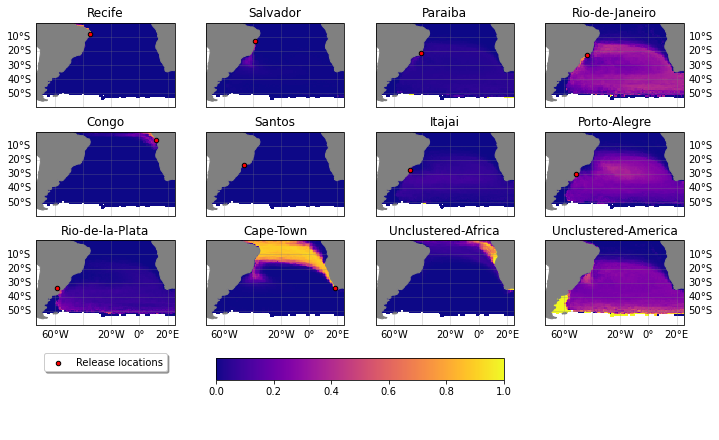

In [29]:
# posterior
t = 0
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       sharey=True, constrained_layout=True)
ax = ax.reshape(16)

for k, loc in enumerate(ordered_labels):
    z = posterior[loc][t]
    ax[k].set_extent([-73.0, 25, -60, 0], crs=ccrs.PlateCarree())
    # ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=2, facecolor='#808080')
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x, y, z, cmap='plasma', vmax=1)
    
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.5)

    if k in [1, 2, 3, 5, 6, 7, 9, 10, 11]:
        gl.left_labels = False

    if k in [0, 1, 2, 3, 4, 5, 6, 7]:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False
    
    if k in [3, 7, 11]:
        gl.right_labels = True
        
    if loc not in ['Unclustered-Africa', 'Unclustered-America']:
        h = ax[k].scatter(river_sources[loc][1], river_sources[loc][0],
                          s=20, marker='o', color='red', edgecolors='k',
                          zorder=3, label='Release locations')

for k in range(12, 16):
    ax[k].axis('off')

ax[12].legend(handles=[h], loc='upper center', shadow=True)
bar_ax = fig.add_axes([0.3, 0.13, 0.4, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal')

# plt.savefig(output_path + 'likelihood.pdf', format='pdf')
# plt.close()

In [31]:
t =0
total = 0
for k, loc in enumerate(ordered_labels):
    
    total += posterior[loc][t]
    
np.nanmean(total.data)

1.0

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


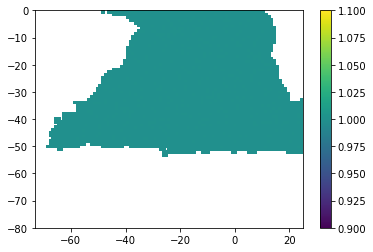

In [35]:
plt.pcolormesh(x,y, total)
plt.colorbar()

# Time series
## particle age

In [16]:
posterior30 = xr.load_dataset('../data/analysis/sa-s06/posterior_sa-S06_aw30.nc')
likelihood30 = xr.load_dataset('../data/analysis/sa-s06/likelihood_sa-S06_aw30.nc')

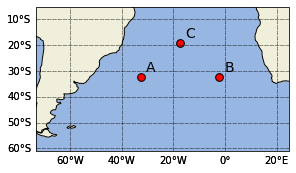

In [17]:
fig,ax = plt.subplots(figsize=(4,4),
                      subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.COASTLINE)

ilons = [40,70, 55]
ilats = [47,47,60]
labels= ['A', 'B','C']


for i in range(3):
    ax.scatter(posterior30['lon'][ilons[i]], posterior30['lat'][ilats[i]], 
               s=60, marker='o', color='red', edgecolors='k')
    ax.text(posterior30['lon'][ilons[i]]+2, posterior30['lat'][ilats[i]]+2, labels[i], fontsize=14)
    
plt.savefig('../article_figs/map', dpi=200)

In [18]:
posterior30

<xarray.Dataset>
Dimensions:          (time: 53, x: 98, y: 75)
Coordinates:
  * time             (time) int64 30 60 90 120 150 ... 1470 1500 1530 1560 1590
    lon              (x) float64 -73.0 -71.99 -70.98 -69.97 ... 22.98 23.99 25.0
    lat              (y) float64 -80.0 -78.99 -77.97 ... -7.027 -6.014 -5.0
Dimensions without coordinates: x, y
Data variables:
    Congo            (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Cape-Town        (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Rio-de-la-Plata  (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Porto-Alegre     (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Santos           (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Paraiba          (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Itajai           (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Rio-de-Janeiro   (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Salvador         (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    Recife           (time, x, y) float64 nan nan nan nan ... nan nan nan nan
    counts           (time, x, y) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    description:     Posterior probability for sa-s06.
    average_window:  30

In [19]:
np.where(abs(posterior30['lon'] - 6.287) < 1)

(array([78, 79]),)

In [20]:
12*30

360

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


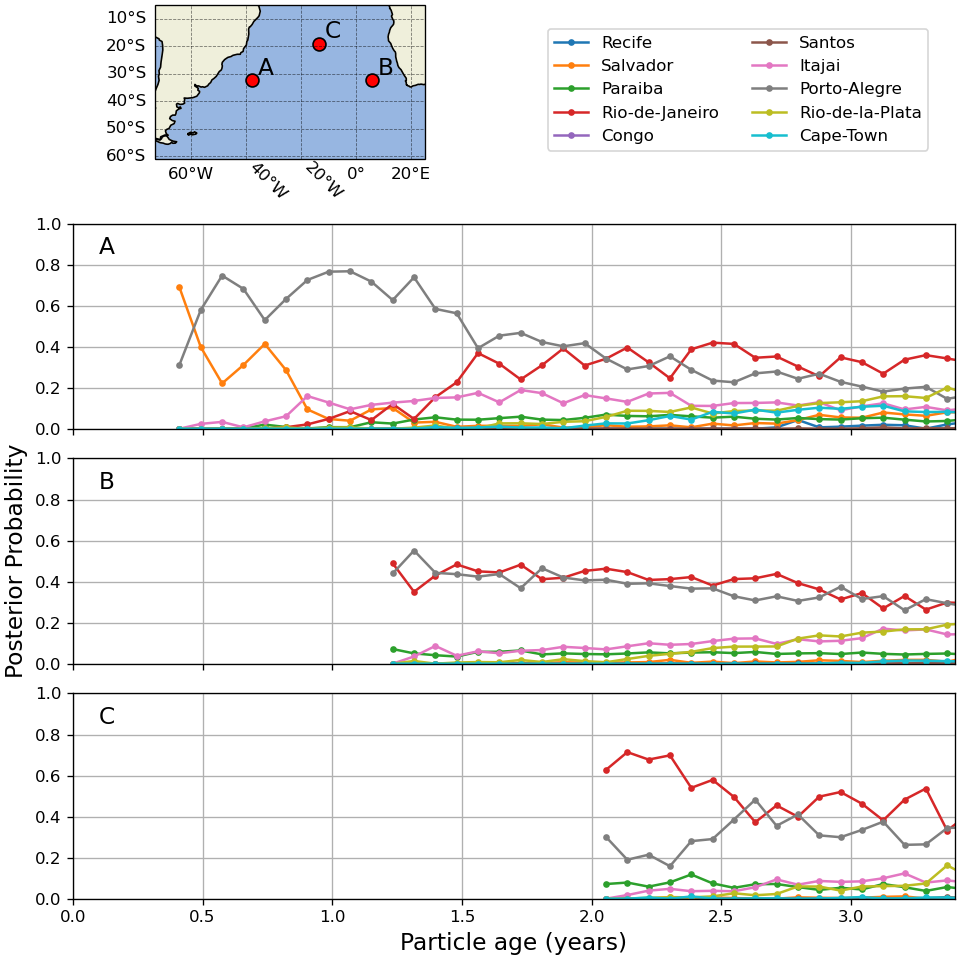

In [22]:
min_particle_cond = 10

A = (35,47)
B = (78,47)
C = (59,60)
time = np.linspace(1, 53, 53)*30/365

fig = plt.figure(figsize=(8,8), constrained_layout=True)
gs = fig.add_gridspec(4, 2, wspace=0.05, height_ratios=[0.2]+[0.8/3]*3)

##
ax00 = fig.add_subplot(gs[0, 0], projection= ccrs.PlateCarree())
gl = ax00.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax00.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax00.add_feature(cfeature.OCEAN)
ax00.add_feature(cfeature.LAND, zorder=1)
ax00.add_feature(cfeature.COASTLINE)

ilons = [A[0], B[0], C[0]]
ilats = [A[1], B[1], C[1]]
labels= ['A', 'B','C']


for i in range(3):
    ax00.scatter(posterior30['lon'][ilons[i]], posterior30['lat'][ilats[i]], 
               s=60, marker='o', color='red', edgecolors='k')
    ax00.text(posterior30['lon'][ilons[i]]+2, posterior30['lat'][ilats[i]]+2, labels[i], fontsize=14)
    
##
ax01 = fig.add_subplot(gs[0, 1])
ax01.axis('off')

##
ax11 = fig.add_subplot(gs[1, :])
ax21 = fig.add_subplot(gs[2, :], sharex=ax11)
ax31 = fig.add_subplot(gs[3, :] , sharex=ax11)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)


handles = []
for k,loc in enumerate(ordered_labels):
    
    a = posterior30[loc][:, A[0], A[1]].where(posterior30['counts'][:, A[0], A[1]]>min_particle_cond)
    b = posterior30[loc][:, B[0], B[1]].where(posterior30['counts'][:, B[0], B[1]]>min_particle_cond)
    c = posterior30[loc][:, C[0], C[1]].where(posterior30['counts'][:, C[0], C[1]]>min_particle_cond)
    
    hdl = ax11.plot(time, a, '.-', label=loc, color=f'C{k}')
    ax21.plot(time, b, '.-',label=loc, color=f'C{k}')
    ax31.plot(time, c, '.-', label=loc, color=f'C{k}')
    
    
    handles.append(hdl[0])

# ax11_t = ax11.twinx()
# ax21_t = ax21.twinx()
# ax31_t = ax31.twinx()
 
# hdl_twin = ax11_t.plot(time, posterior30['counts'][:, A[0], A[1]], '--',label='Number of particles', c='k')
# handles = handles + hdl_twin

# ax21_t.plot(time, posterior30['counts'][:,  B[0], B[1]], '--',label=loc, c='k')
# ax31_t.plot(time, posterior30['counts'][:,  C[0], C[1]], '--',label=loc, c='k')
# up_lim = 200
# ax11_t.set_ylim(0, up_lim)
# ax21_t.set_ylim(0, up_lim)
# ax31_t.set_ylim(0, up_lim)
ax11.set_xlim(0, 3.4)
ax21.set_xlim(0, 3.4)
ax31.set_xlim(0, 3.4)


# ax21_t.set_ylabel('Number of particles', fontsize=14, labelpad=10)
ax21.set_ylabel('Posterior Probability', fontsize=14)

ax11.grid(); ax21.grid(); ax31.grid()
ax11.set_ylim(0,1); ax21.set_ylim(0,1); ax31.set_ylim(0,1);

ax11.text(0.1, 0.85, 'A', fontsize=14)
ax21.text(0.1, 0.85, 'B', fontsize=14)
ax31.text(0.1, 0.85, 'C', fontsize=14)
ax31.set_xlabel('Particle age (years)', fontsize=14)

ax01.legend(handles=handles, loc='lower center', ncol=2)
#plt.savefig('../article_figs/time_series_map', dpi=300)

<IPython.core.display.Javascript object>


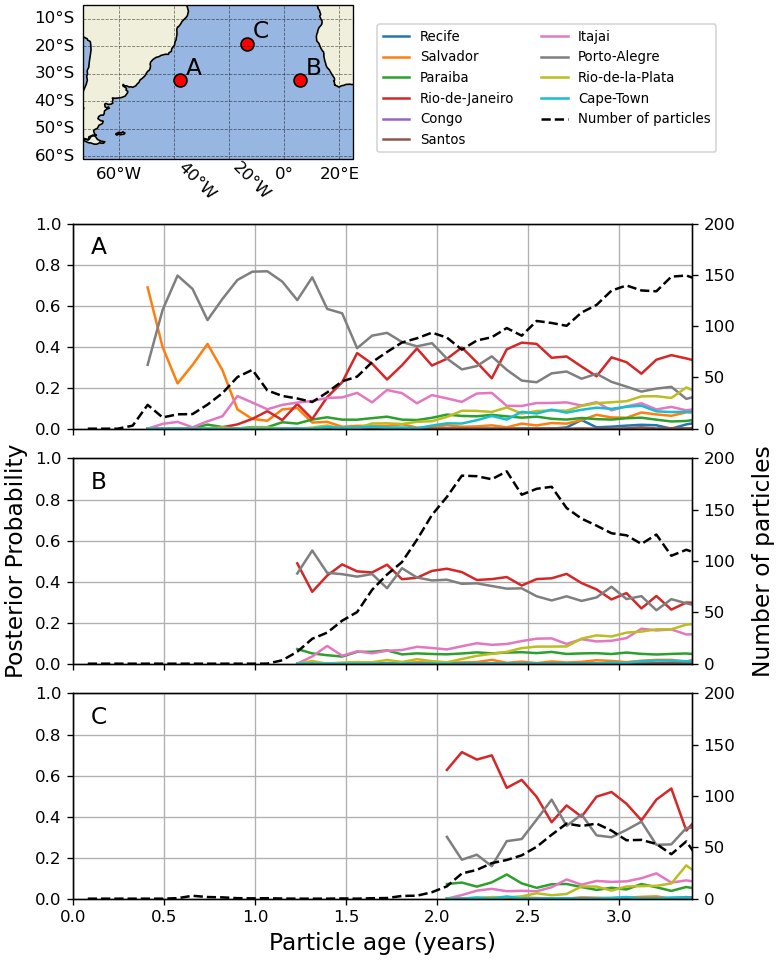

In [23]:
min_particle_cond = 10

A = (35,47)
B = (78,47)
C = (59,60)
time = np.linspace(1, 53, 53)*30/365

fig = plt.figure(figsize=(6.5,8), constrained_layout=True)
gs = fig.add_gridspec(4, 2, wspace=0.05, height_ratios=[0.2]+[0.8/3]*3)

##
ax00 = fig.add_subplot(gs[0, 0], projection= ccrs.PlateCarree())
gl = ax00.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax00.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax00.add_feature(cfeature.OCEAN)
ax00.add_feature(cfeature.LAND, zorder=1)
ax00.add_feature(cfeature.COASTLINE)

ilons = [A[0], B[0], C[0]]
ilats = [A[1], B[1], C[1]]
labels= ['A', 'B','C']


for i in range(3):
    ax00.scatter(posterior30['lon'][ilons[i]], posterior30['lat'][ilats[i]], 
               s=60, marker='o', color='red', edgecolors='k')
    ax00.text(posterior30['lon'][ilons[i]]+2, posterior30['lat'][ilats[i]]+2, labels[i], fontsize=14)
    
##
ax01 = fig.add_subplot(gs[0, 1])
ax01.axis('off')

##
ax11 = fig.add_subplot(gs[1, :])
ax21 = fig.add_subplot(gs[2, :], sharex=ax11)
ax31 = fig.add_subplot(gs[3, :] , sharex=ax11)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)


handles = []
for k,loc in enumerate(ordered_labels):
    
    a = posterior30[loc][:, A[0], A[1]].where(posterior30['counts'][:, A[0], A[1]]>min_particle_cond)
    b = posterior30[loc][:, B[0], B[1]].where(posterior30['counts'][:, B[0], B[1]]>min_particle_cond)
    c = posterior30[loc][:, C[0], C[1]].where(posterior30['counts'][:, C[0], C[1]]>min_particle_cond)
    
    hdl = ax11.plot(time, a, '-', label=loc, color=f'C{k}')
    ax21.plot(time, b, '-',label=loc, color=f'C{k}')
    ax31.plot(time, c, '-', label=loc, color=f'C{k}')
    
    
    handles.append(hdl[0])

ax11_t = ax11.twinx()
ax21_t = ax21.twinx()
ax31_t = ax31.twinx()
 
hdl_twin = ax11_t.plot(time, posterior30['counts'][:, A[0], A[1]], '--',label='Number of particles', c='k')
handles = handles + hdl_twin

ax21_t.plot(time, posterior30['counts'][:,  B[0], B[1]], '--',label=loc, c='k')
ax31_t.plot(time, posterior30['counts'][:,  C[0], C[1]], '--',label=loc, c='k')
up_lim = 200
ax11_t.set_ylim(0, up_lim)
ax21_t.set_ylim(0, up_lim)
ax31_t.set_ylim(0, up_lim)
ax11.set_xlim(0, 3.4)
ax21.set_xlim(0, 3.4)
ax31.set_xlim(0, 3.4)


ax21_t.set_ylabel('Number of particles', fontsize=14, labelpad=10)
ax21.set_ylabel('Posterior Probability', fontsize=14)

ax11.grid(); ax21.grid(); ax31.grid()
ax11.set_ylim(0,1); ax21.set_ylim(0,1); ax31.set_ylim(0,1);

ax11.text(0.1, 0.85, 'A', fontsize=14)
ax21.text(0.1, 0.85, 'B', fontsize=14)
ax31.text(0.1, 0.85, 'C', fontsize=14)
ax31.set_xlabel('Particle age (years)', fontsize=14)

ax01.legend(handles=handles, loc='lower center', ncol=2, fontsize=8)
#plt.savefig('../article_figs/time_series_map', dpi=300)

<IPython.core.display.Javascript object>


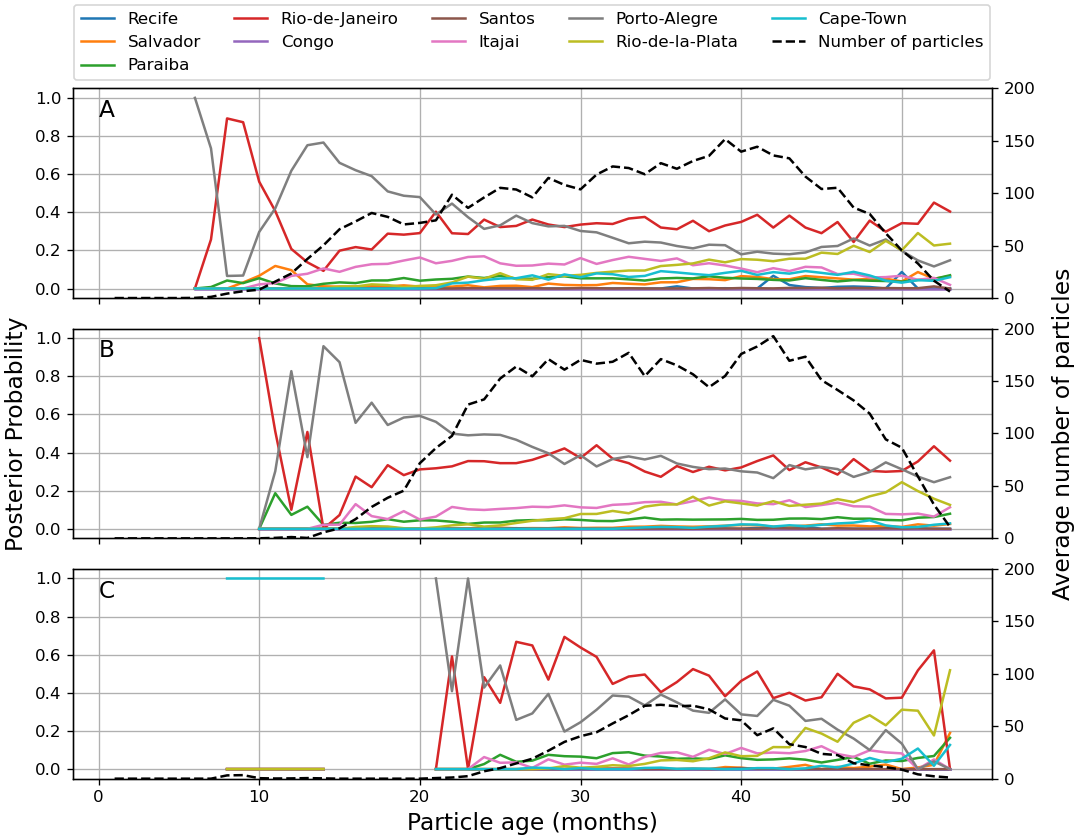

In [28]:
A = (40,47)
B = (70,47)
C = (55,60)

fig,ax = plt.subplots(ncols=1,nrows=3,figsize=(9,7),
                      sharex=True, constrained_layout=True)

time = np.linspace(1,53, 53)
handles = []
for k,loc in enumerate(ordered_labels):
    
    hdl = ax[0].plot(time, posterior30[loc][:, A[0], A[1]], '-',label=loc, color=f'C{k}')
    ax[1].plot(time, posterior30[loc][:, B[0], B[1]], '-',label=loc, color=f'C{k}')
#     ax[2].plot(time, posterior30[loc][:, 70, 70], '-', label=loc, color=colors[k])
    ax[2].plot(time, posterior30[loc][:, C[0], C[1]], '-', label=loc, color=f'C{k}')

    handles.append(hdl[0])
    
ax02 = ax[0].twinx()
ax12 = ax[1].twinx()
ax22 = ax[2].twinx()
hdl_twin = ax02.plot(time, posterior30['counts'][:, A[0], A[1]], '--',label='Number of particles', c='k')
handles = handles+hdl_twin
ax12.plot(time, posterior30['counts'][:, B[0], B[1]], '--',label=loc, c='k')
ax22.plot(time, posterior30['counts'][:, C[0], C[1]], '--',label=loc, c='k')
top_lim = 200
ax02.set_ylim(0, top_lim)
ax12.set_ylim(0, top_lim)
ax22.set_ylim(0, top_lim)

# ax02.set_ylabel('Number particles')
ax12.set_ylabel('Average number of particles', fontsize=14, labelpad=10)
ax[1].set_ylabel('Posterior Probability', fontsize=14)
# ax22.set_ylabel('Number particles')

for i in range(3):
    ax[i].grid()
    ax[i].set_ylim(-0.05, 1.05)

ax[0].text(0, 0.9, 'A', fontsize=14)
ax[1].text(0, 0.9, 'B', fontsize=14)
ax[2].text(0, 0.9, 'C', fontsize=14)
ax[2].set_xlabel('Particle age (months)', fontsize=14)

ax[0].legend(handles=handles, bbox_to_anchor=(0.5, 1), loc='lower center', ncol=5)
plt.savefig('../article_figs/time_series_nomap', dpi=200)

# Beaching probability

Detect new coastal cells after computing the histogram?

In [122]:
america = xr.load_dataset('../analysis/beach_posterior_America_average_1234.nc')
africa = xr.load_dataset('../analysis/beach_posterior_Africa_average_1234.nc')

In [124]:
african_sources = ['Congo', 'Cape-Town']
american_sources = ['Paraiba', 'Itajai', 'Rio-de-la-Plata', 'Rio-de-Janeiro', 'Porto-Alegre', 'Santos',
                   'Recife', 'Salvador']

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator


(0.0, 1.0, -51.0, -5.0)

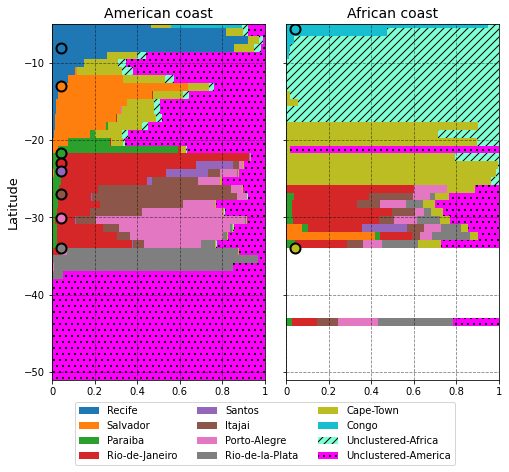

In [130]:
# x_colors = np.linspace(0,1, 9)
# colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, wspace=0.1, height_ratios=[0.9, 0.1])
ax = gs.subplots(sharey=True)

lower_margin_am = 0
lower_margin_af = 0

for k, loc in enumerate(ordered_labels):
    
    if loc in clusters:
        ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
               left=lower_margin_am, color=f'C{k}',align='center')
        lower_margin_am += np.nan_to_num(america[loc][0])

        ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
               left=lower_margin_af, color=f'C{k}', align='center')
        lower_margin_af += np.nan_to_num(africa[loc][0])
        
    elif loc=='Unclustered-Africa':
        ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
               left=lower_margin_am, color='aquamarine',align='center', hatch='///')
        lower_margin_am += np.nan_to_num(america[loc][0])

        ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
               left=lower_margin_af, color='aquamarine', align='center', hatch='///')
        lower_margin_af += np.nan_to_num(africa[loc][0])
        
    elif loc=='Unclustered-America':
        ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
               left=lower_margin_am, color='magenta',align='center', hatch='..')
        lower_margin_am += np.nan_to_num(america[loc][0])

        ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
               left=lower_margin_af, color='magenta', align='center', hatch='..')
        lower_margin_af += np.nan_to_num(africa[loc][0])
        
        
    
    if loc in african_sources:
        ax[0,1].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
    elif loc in american_sources:
        ax[0,0].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
my_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax[0,0].set_xticklabels(my_ticks)
ax[0,1].set_xticklabels(my_ticks)
ax[0,0].set_ylim(-51, -5)
ax[0,0].set_xlim(0, 1)
ax[0,0].legend(bbox_to_anchor=(1, -0.15), loc='center', ncol=3)
ax[0,0].set_title('American coast', fontsize=14)

ax[0,1].set_title('African coast', fontsize=14)
ax[0,0].set_ylabel('Latitude', fontsize=13)
# ax[0,0].set_xlabel('Probability', fontsize=13)
# ax[0,1].set_xlabel('Probability', fontsize=13)
ax[0,0].grid(color='k', linestyle='--', alpha=0.5)
ax[0,1].grid(color='k', linestyle='--', alpha=0.5)

ax[1,0].axis('off')
ax[1,1].axis('off')

# plt.savefig('../article_figs/beached_posterior_4y_average', dpi=200)

# River Sources map

<IPython.core.display.Javascript object>


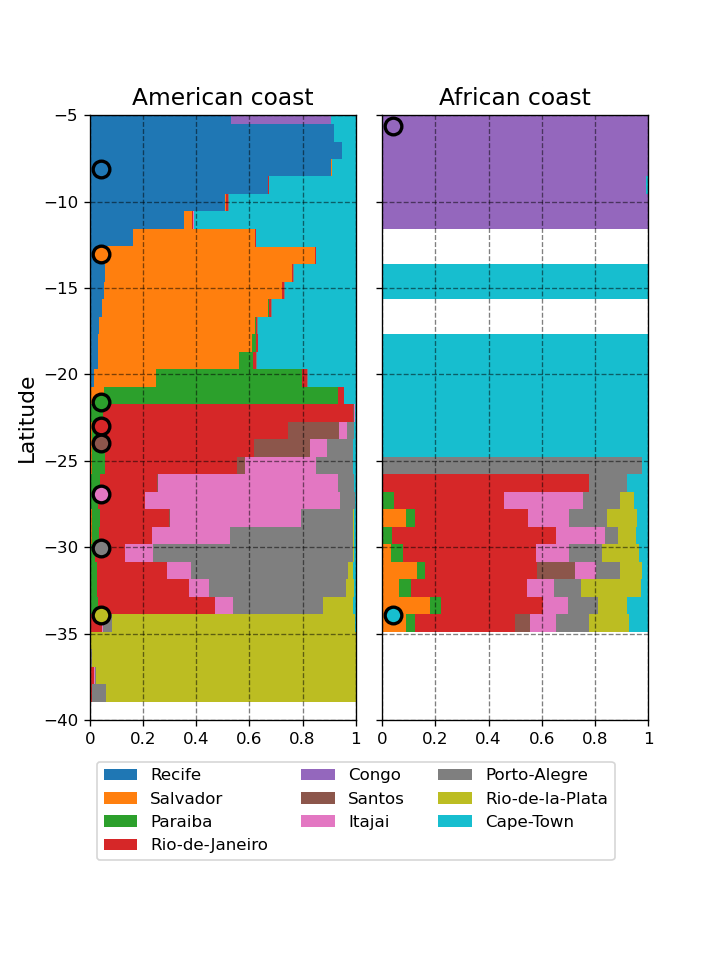

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


In [34]:
# x_colors = np.linspace(0,1, 9)
# colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(6,8))
gs = fig.add_gridspec(2, 2, wspace=0.1, height_ratios=[0.9, 0.1])
ax = gs.subplots(sharey=True)

lower_margin_am = 0
lower_margin_af = 0

for k, loc in enumerate(ordered_labels):
    ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
           left=lower_margin_am, color=f'C{k}',align='center')
    lower_margin_am += np.nan_to_num(america[loc][0])
    
    ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
           left=lower_margin_af, color=f'C{k}', align='center')
    lower_margin_af += np.nan_to_num(africa[loc][0])
    
    if loc in african_sources:
        ax[0,1].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
    elif loc in american_sources:
        ax[0,0].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
my_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax[0,0].set_xticklabels(my_ticks)
ax[0,1].set_xticklabels(my_ticks)
ax[0,0].set_ylim(-40, -5)
ax[0,0].set_xlim(0, 1)
ax[0,0].legend(bbox_to_anchor=(1, -0.15), loc='center', ncol=3)
ax[0,0].set_title('American coast', fontsize=14)

ax[0,1].set_title('African coast', fontsize=14)
ax[0,0].set_ylabel('Latitude', fontsize=13)
# ax[0,0].set_xlabel('Probability', fontsize=13)
# ax[0,1].set_xlabel('Probability', fontsize=13)
ax[0,0].grid(color='k', linestyle='--', alpha=0.5)
ax[0,1].grid(color='k', linestyle='--', alpha=0.5)

ax[1,0].axis('off')
ax[1,1].axis('off')

# plt.savefig('../article_figs/beached_posterior_4y_average', dpi=200)